<a href="https://colab.research.google.com/github/himanshkr03/Data_Visualization_Experiment/blob/main/Data_Visualization_exp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Step 1: Load the Dataset
file_path = '/content/phone_usage_india.csv'  # Replace with your uploaded file's path
data = pd.read_csv(file_path)

print("Dataset Loaded Successfully!\n")

Dataset Loaded Successfully!



In [7]:
# Step 2: Data Overview
print("Initial Dataset Information:")
data.info()
print("\nFirst 5 Rows of the Dataset:")
print(data.head())


Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      1

In [8]:
# Step 3: Data Cleaning and Preprocessing
print("\nCleaning and Preprocessing Data...")

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Drop rows with missing values (or handle appropriately)
data = data.dropna()
print("\nData after removing missing values:")
print(data.info())

# Encode categorical variables using one-hot encoding
categorical_columns = ['Gender', 'Location', 'Phone Brand', 'OS', 'Primary Use']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Normalize numerical columns for uniformity
numeric_columns = ['Age', 'Screen Time (hrs/day)', 'Data Usage (GB/month)',
                   'Calls Duration (mins/day)', 'Number of Apps Installed',
                   'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
                   'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)', 'Monthly Recharge Cost (INR)']
data[numeric_columns] = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()

print("\nData Cleaning and Preprocessing Completed!\n")


Cleaning and Preprocessing Data...

Missing Values per Column:
User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

Data after removing missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64

Performing Exploratory Data Analysis...



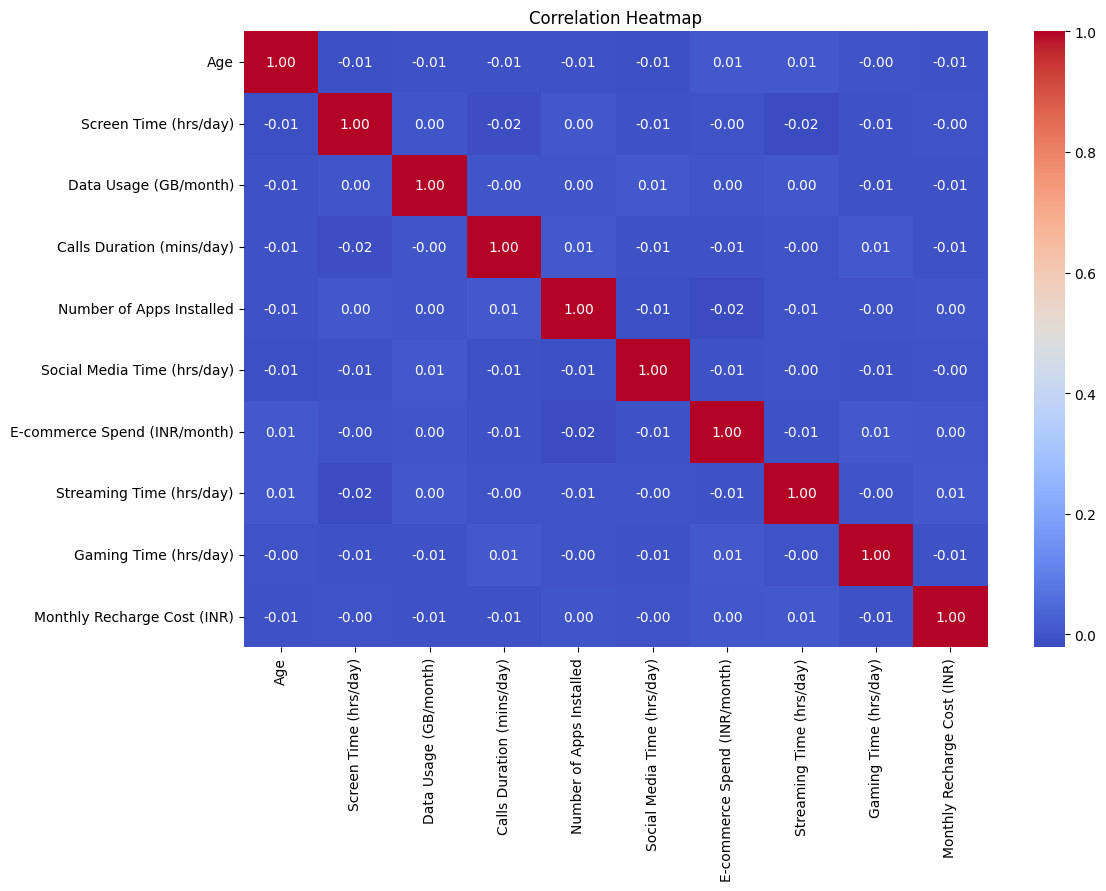

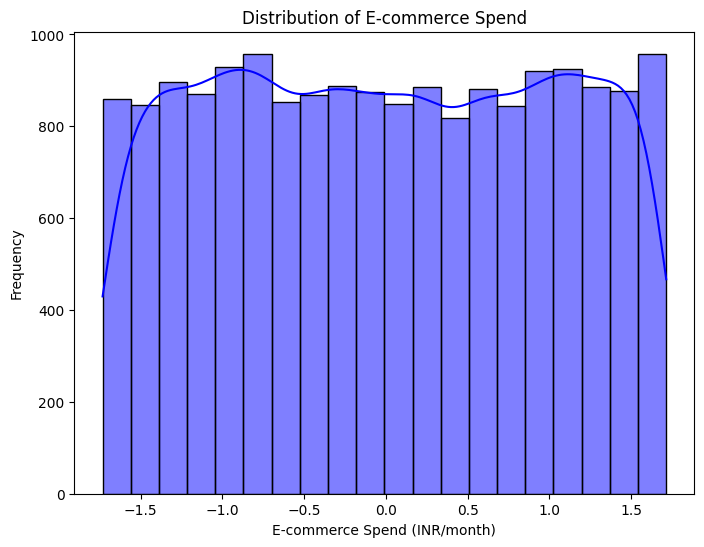

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

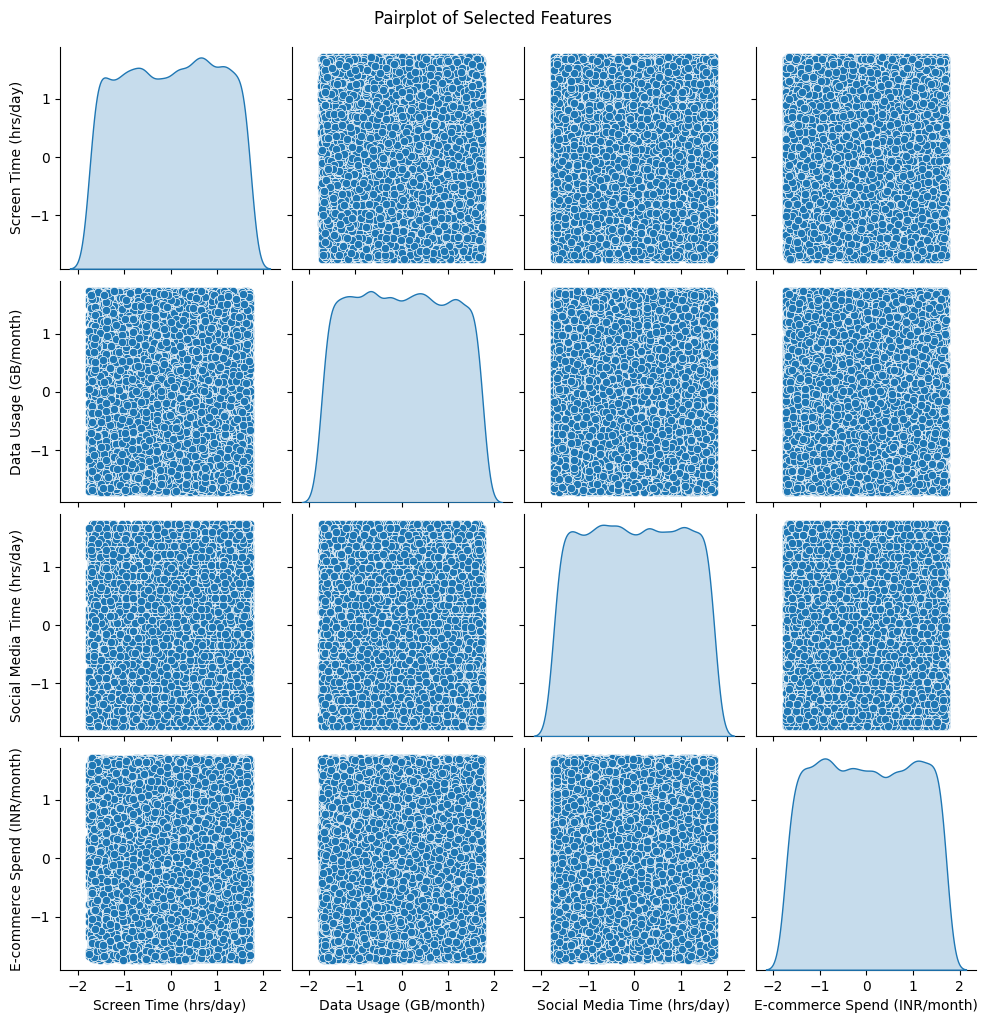

In [14]:
# Step 4: Exploratory Data Analysis (EDA)
print("Performing Exploratory Data Analysis...\n")

# Correlation Heatmap
# Exclude non-numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.histplot(data['E-commerce Spend (INR/month)'], kde=True, color='blue', bins=20)
plt.title('Distribution of E-commerce Spend')
plt.xlabel('E-commerce Spend (INR/month)')
plt.ylabel('Frequency')
plt.show()

# Pairplot for selected features
selected_features = ['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)']
sns.pairplot(data[selected_features], diag_kind='kde', kind='scatter', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [16]:
# Step 5: Splitting the Data
print("\nSplitting Data into Training and Testing Sets...")
# Drop 'User ID' column before creating features
X = data.drop(['E-commerce Spend (INR/month)', 'User ID'], axis=1)  # Features
y = data['E-commerce Spend (INR/month)']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Split Completed!\n")

# ... (rest of your code) ...

# Step 6: Train a Machine Learning Model
print("Training the Linear Regression Model...\n")
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Training Completed!\n")

# Step 7: Test the Model
print("Testing the Model...\n")
predictions = model.predict(X_test)


Splitting Data into Training and Testing Sets...
Data Split Completed!

Training the Linear Regression Model...

Model Training Completed!

Testing the Model...



Root Mean Squared Error (RMSE): 0.9937831723787833
R-Squared (R2 Score): -0.0014384841459584852
Mean Absolute Error (MAE): 0.8618867442105056
Mean Absolute Percentage Error (MAPE): 1.0862014282776329



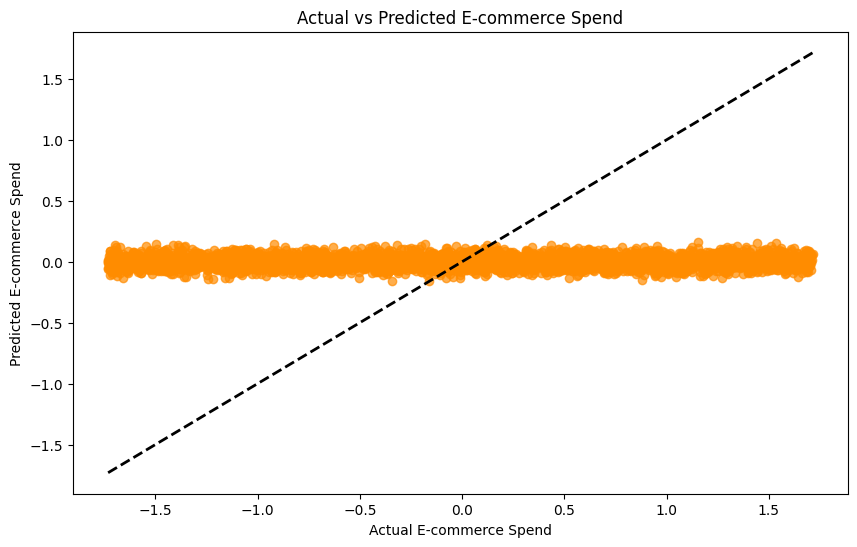

In [17]:
# Step 8: Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2 Score): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}\n")

# Step 9: Visualize Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='darkorange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted E-commerce Spend')
plt.xlabel('Actual E-commerce Spend')
plt.ylabel('Predicted E-commerce Spend')
plt.show()

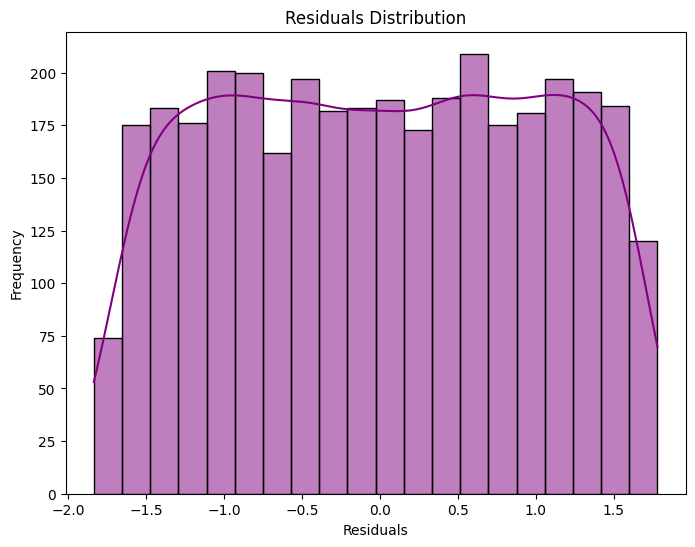

Predicting Future Trends...

Sample Future Predictions:
Sample 1: Predicted E-commerce Spend = 0.08
Sample 2: Predicted E-commerce Spend = 0.07
Sample 3: Predicted E-commerce Spend = -0.01
Sample 4: Predicted E-commerce Spend = 0.04
Sample 5: Predicted E-commerce Spend = 0.02


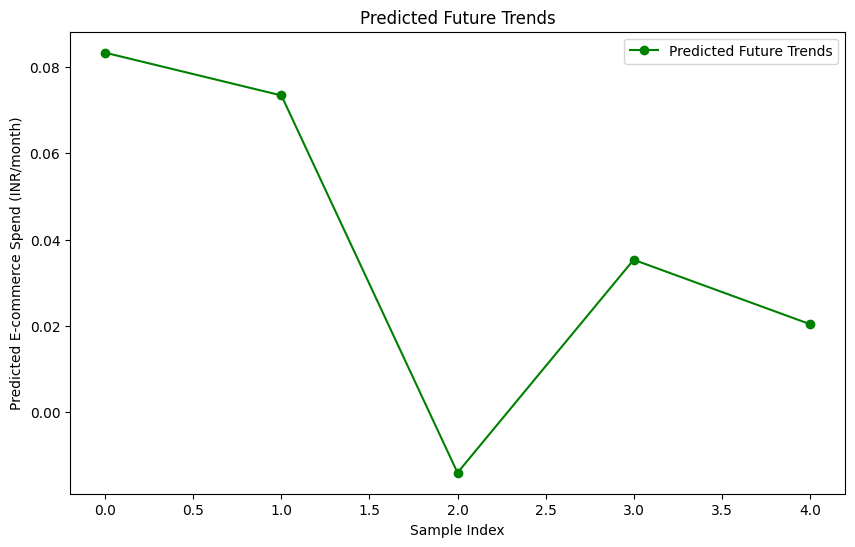

In [18]:
# Residuals Visualization
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Step 10: Predict Future Trends
print("Predicting Future Trends...\n")
# Example: Use a sample from the test set for prediction
sample_data = X_test.iloc[:5]  # Replace with actual future data if available
future_predictions = model.predict(sample_data)

print("Sample Future Predictions:")
for i, prediction in enumerate(future_predictions, 1):
    print(f"Sample {i}: Predicted E-commerce Spend = {prediction:.2f}")

# Prediction Trend Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(len(future_predictions)), future_predictions, label='Predicted Future Trends', marker='o', color='green')
plt.title('Predicted Future Trends')
plt.xlabel('Sample Index')
plt.ylabel('Predicted E-commerce Spend (INR/month)')
plt.legend()
plt.show()
